# OK Cupid Date a Scientist

In this project data from OK Cupid dating app will be analysed using machine learning models.

To start, even before defining the goals it's necessary to load and inspect the data, see how many columns there are and what each one represents, see the length of the data and find out the main missing values.
After all of that it's done, we can now define our goals.

Firstly let's load the necessary libraries.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Inspect the Data

Using the pandas library we will import the file "profiles.csv", which is the file that all of our data is on.
First we'll create a DataFrame named "profiles", then the first five rows will be inspected and the name of the columns obtained.

After loading and giving a first inspection to the data some things can be said:
* the data is composed by 31 diferent columns;
* 10 of those columns are essays, wich mean that we will have to ignore them in our data analysis;
* the rest of them are about the lifestyles, education, etc. Meaning that they are important to the data analysis;
* the data is composed by 59946 rows, and because each row is a user, it means that there is information about 59946 users.

In [4]:
profiles = pd.read_csv("profiles.csv")

print(profiles.head())
print(profiles.columns)
print(len(profiles))

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

## Create Summary Statistics

Now that the data as been somewhat explored it's time to get rid of the data that can not be easily explored (the essays) and create visualizations from the other columns.
Then let's figure out what are the columns with the most missing values and plot them in an bar plot.

Text(0.5, 1.0, 'Missing Values')

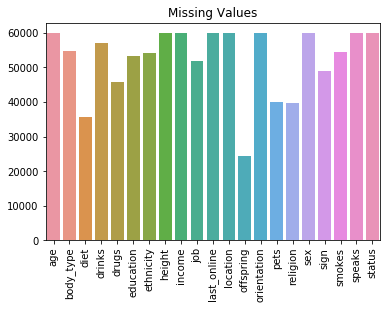

In [25]:
useful_columns = ['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
                  'last_online', 'location', 'offspring', 'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes',
                  'speaks', 'status']
profiles_clean = profiles[useful_columns]
missing = pd.DataFrame()

for column in useful_columns:
    missing[column] = profiles_clean[column].isna().value_counts()
    
sns.barplot(data = missing)
plt.xticks(rotation = 90)
plt.title("Missing Values")

#### More data exploration

There are 10 columns with no missing values, so first lets see which of them are numeric values.
From the 10 columns 3 are of numeric type, wich makes sense.

In [27]:
full_columns = ["age", "height", "income", "last_online", "location", "orientation", "sex", "speaks", "status"]
full = profiles_clean[full_columns]
print(full.dtypes)

age              int64
height         float64
income           int64
last_online     object
location        object
orientation     object
sex             object
speaks          object
status          object
dtype: object


##### Exploring numeric columns
Now let's explore the distribution of two columns, the age and the income.

###### Age
For the age column whe are interested in knowing the average and median age. We will also create some plots to see the distribution of the data.
From the histogram it's possible to see that the age distribution is right skewed, being that the average and the median values make sense.
From the boxplot it's clear to see some outliers.

The average age is of 32.3402895939679 years.
The median age is of 30.0 years.
The oldest person is 110 years old.
The youngest person is 18 years old.
The age range is of 92 years.


Text(0, 0.5, 'Amount')

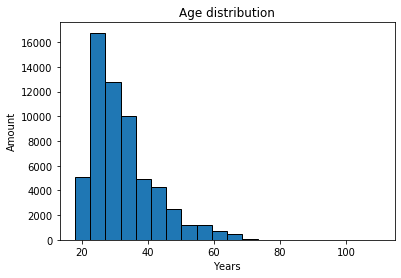

In [36]:
print("The average age is of {0} years.".format(np.mean(full["age"])))
print("The median age is of {0} years.".format(np.median(full["age"])))

oldest = np.max(full["age"])
youngest = np.min(full["age"])
age_range = oldest - youngest
print("The oldest person is {0} years old.".format(oldest))
print("The youngest person is {0} years old.".format(youngest))
print("The age range is of {0} years.".format(age_range))

plt.hist(full["age"], bins = 20, edgecolor = "black")
plt.title("Age distribution")
plt.xlabel("Years")
plt.ylabel("Amount")

Text(0.5, 1.0, 'Age boxplot')

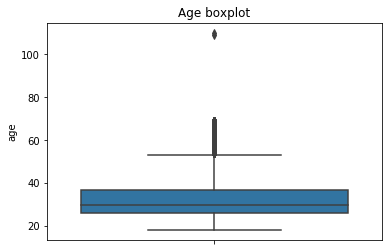

In [38]:
sns.boxplot(data = full, y = "age")
plt.title("Age boxplot")

###### Income
Now let's explore the income of the users.
From the results produced below it's clear to see that althoug the income column has no missing values, is due to the fact that whenever ther was no income, it was attributed a value of -1, and being the number of users with that value so high we will not continue the analysis in this variable.

In [43]:
print("The average income is of {0}.".format(np.mean(full["income"])))
print("The median income is of {0}.".format(np.median(full["income"])))

max_in = np.max(full["income"])
min_in = np.min(full["income"])
income_range = max_in - min_in
print("The maximum income is of {0}.".format(max_in))
print("The maximum income is of {0}.".format(min_in))
print("The income range is of {0}.".format(income_range))

print(full["income"].value_counts())

The average income is of 20033.222533613585.
The median income is of -1.0.
The maximum income is of 1000000.
The maximum income is of -1.
The income range is of 1000001.
-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64


##### More variables
Now let's explore some other variables.
The variables that are interesting to explore are:
* `orientation`
* `sex`

###### Orientation and Sex
First let's see the values available for both variables, next we'll do some summary statistics and to end we'll see if there is any correlation between the two.

There are three categories for the `orientation` variable:
* straight
* gay
* bisexual

And two categories for the `sex` variable, making it a binary variable:
* male
* female

In a first visual analysis it's possible to say that the majority of users are straight and there are more mens in the dataset.

With the last rwo bar plots it's clear to see that the straight orientation is dominant in both sexes.

In [50]:
print("Orientation values:")
print(full["orientation"].value_counts())
print("\nSex values:")
print(full["sex"].value_counts())

Orientation values:
straight    51606
gay          5573
bisexual     2767
Name: orientation, dtype: int64

Sex values:
m    35829
f    24117
Name: sex, dtype: int64


Text(0.5, 1.0, 'Orientation Count')

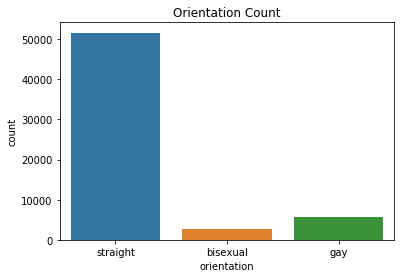

In [56]:
sns.countplot(full["orientation"])
plt.title("Orientation Count")

Text(0.5, 1.0, 'Sex Count')

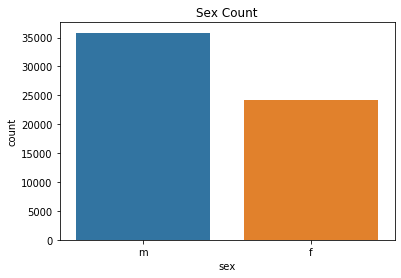

In [57]:
sns.countplot(full["sex"])
plt.title("Sex Count")

Text(0.5, 1.0, 'Male Orientation Count')

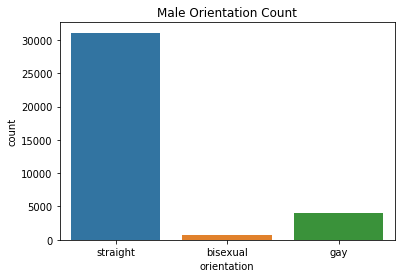

In [61]:
male_orientation = full["orientation"][full["sex"] == "m"]
female_orientation = full["orientation"][full["sex"] == "f"]

sns.countplot(male_orientation)
plt.title("Male Orientation Count")

Text(0.5, 1.0, 'Female Orientation Count')

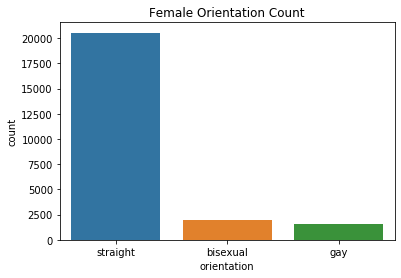

In [62]:
sns.countplot(female_orientation)
plt.title("Female Orientation Count")

###### Orientation table of proportions
It is interesting to see the proportion of the orientations i both sexes, and to visualize that a table of proportions it's the best option.

In [69]:
or_freq_tab = pd.crosstab(full["sex"], full["orientation"])
or_prop_tab = or_freq_tab / len(full)
print(or_prop_tab)

orientation  bisexual       gay  straight
sex                                      
f            0.033297  0.026491  0.342525
m            0.012862  0.066476  0.518350
